In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [5]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


 - The features used from the Boston housing dataset are 'RM', 'LSTAT', and 'PTRATIO'.
 The target variable is MEDV.
 
 - With general assumptions and instincts,
 1) RM - is concerned with Physical size. As size increases, cost of construction increases. This implies that as RM increases MEDV (price) increases.
 2) If lower income families decrease, MDEV rises as it will be considered as a rich neighborhood. As LSAT decreases, MDEV increases as wealthier stays in those neighborhoods.
 3) If Student to Teacher ratio increases, it means the quality of education will be reduced. Which means schools in the neignorhood are not the best. Therefore as PTRATIO increases the MEDV decreases. 

In [29]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [31]:
#Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


- The obtained R^2 is 0.923 or 92.3% of variance in target variable. 
- Though it had considerably higher accuracy (0.923) and it is close to 1.0. And also R^2 lies between [-1, 1]. 100% indicates that the model explains all the variability of the response data around its mean.
- But the data size is limited to just 5. This is drawback to endorse that variation of target variable is succesfully captured. It would be immature to declare that to be successful without considerable size of data rather than just 5.
- R-squared provides an estimate of the strength of the relationship between your model and the response variable, it does not provide a formal hypothesis test for this relationship. 

In [34]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state=33, test_size=0.2)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?
- For any model to predict well and have minimized erros on the data what we are working. Those models need to be testified with the testing data sets. Training datasets can help us in building those models. Testing data on a model could help us reducing the variance and prediction errors. The ratio of that split in data could determine model feasibity with features or dimensions enabled in the model.

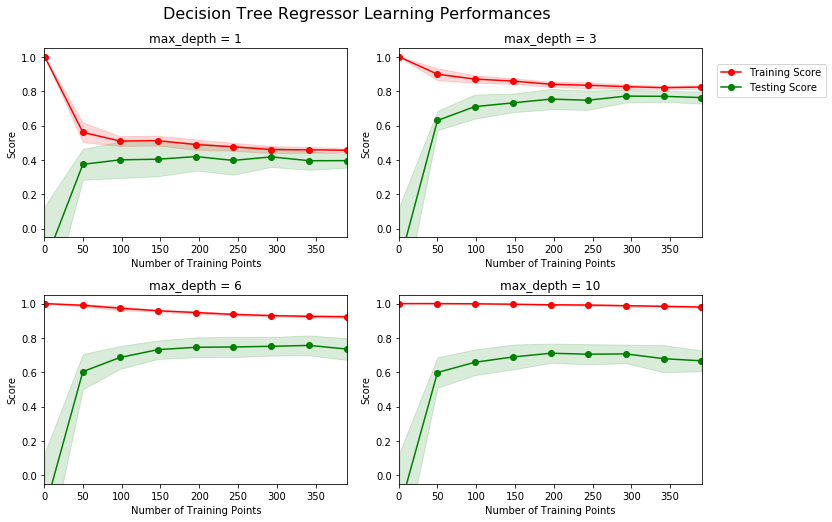

In [40]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?
Hint: Are the learning curves converging to particular scores?

* Consider the decision tree with max_depth = 1, where the training score and testing score converge at value of 0.45 as the datapoints were being added. But as the datapoints being added, the training score is decremented and then made constant. But the testing score is incremented and then almost constant. There is considerable Bias in the model. 
- More data useful only if we used a more complex model.
- Considering model with max_depth = 10, the training score is almost 1.0 for most of the traing points. And Testing score almost consistent. There seems to be high variance problem. In this instance more data benefit high variance and overfit models. But not always true. Though those scores don't converge, This model depicts the one with minimum bias and variance. 
- Graph of this model/instance doesn't confirm boost in testing score tends with adding more data.

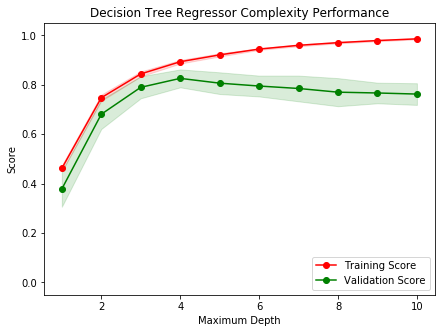

In [41]:
vs.ModelComplexity(X_train, y_train)

Q) When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?
Hint: How do you know when a model is suffering from high bias or high varaiance
-  When model is trained with maximum depth of 1, it has high BIAS. As both the training and validation scores are low. 
- When model trained with maximum depth of 10, it has high variance. As traing score almost reached 1.0 and it has overfitting issue due the constant level in validation score. With considerable error.
- The drop in validation scores for max_depth larger than 4 to 5, should be considered carefully and complexity pertaining at those instances should be reconsidered. Model's variance is getting higher as the depth increases as with the complexity.

Q) Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?
- The maximum depth at 4 best generalizes to unseen data. As at this instance, the system las low validation error and considerable decent training score.
- It can be a best possible bet to handle the unknown data than the other instances or models. This can perform better than the rest.

Q) What is the grid search technique and how it can be applied to optimize a learning algorithm?
- Grid search enables to find the best values by using the determined subset of the hyperparameter space of a learning algorithm to avoid direct optimization of the models. 
- It can be enabled defining a grid on the model. And evaluating its performance. 
- GridSearchCV enables to determine the optimal parameters for the model without the increase of code's complexity. But many computations are needed for larger datasets. RandomizedSearchCV can be used to manage the computational time.
- The highest cross-validation accuracy that matches with the corresponding parameters optimizes the learning algorithm.

Q) What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?
Hint: Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?
- K-fold cross validation summary splits the datasets into k-number of equal size data segments. 
- Performs k independent model trainings using k-1 segments as training data and 1 segment as validation data. The average accuracy of k trainings results in actual accuracy of the model.
- k-fold cross-validation reduces variance of a single trial of a train/test split and provides reliable estimate of out-of-sample performance than train/test split.
- Without use of a crossvalidation set and with GridsearchCV results in different sets of optimal parameters due to the estimate of out-of-sample performance would have a high variance.
- without k-fold cross-validation the probability of grid search selecting the hyper-parameter value combinations which perform well on a specific train-test split is higher, otherwise it is bad/poor. 
- K-fold cross validation do not work well when data is not uniformly distributed 

In [50]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [i for i in range(1,11)]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [51]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


- Earlier I chose max-depth instance to be at 4. For better traning score and lower validation error. This shows my choice is right

In [53]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $409,400.00
Predicted selling price for Client 2's home: $229,682.35
Predicted selling price for Client 3's home: $938,053.85


- These predictions where within the minimum ($105,000.00) and maximum ($1,024,800.00) values of prices in the datasets. These prices may be reasonable as considered by the datapoints of those features previously. So, for unkown data the predictions can rely one those trends in data points. 
- We can inflate or deflate the prices in the prediction model according to the business model of the real estate agent. 
- For client 1, the estimate is closer to the mean and median of the model. The feature values are also in the range of other fetaure values in the data sets. This is an decent choice of estimate.
- For client 2, the estimate is lesser than the mean value of the model. This estimate is fairly less than the estimate of client 1. This is due to the impact of PTRATIO and LSTAT values. Though it is lesser estimate. The client has his/her disadvantages for their property. But it much higher than the minimum value in the data set of prices.
- For Client 3, this is the best bet. This property has all the desired features of an ideal home. Higher RM, lesser PTRATIO and LSTAT values. So an higher estimate offered for this client. Though it is close to highest value in price dataset. When RM values are considered it is the highest value. The estimate can still be increased if possible. As this is an almost ideal property. 

In [6]:
vs.PredictTrials(features, prices, fit_model, client_data)

NameError: name 'fit_model' is not defined

Q) In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.

How relevant today is data that was collected from 1978?
- Age of data is very crucial. The features and dimensions used in old data may not same as features using in current data. For an instance Boston might be a rural in 1917's. But its urban in 2017. Similary in 1970's it might be a semi-urban one. Though some trends seems to be common. Its neither completely irrevalant nor completely relevant. BAIS effect comes in place if no new features considered. PTRATIO may be out of context in those days. 

Are the features present in the data sufficient to describe a home?
- Not all the features are equally important. Features like PTRATIO may not be as important as RM. Though a model can be built with given features. Additional features like Local Amenities, Food stores, Public Transportation, Safety can add complexity to the model. And thereby predictions could be made more standardized.

Is the model robust enough to make consistent predictions?
- As said above, though a model can be built using those features. It would be inappropiate to say that model to be robust based on validation errors obatined from maximum depth 1 to maximum depth 10. And addition of features can make it reliable to make decent predictions. 

Would data collected in an urban city like Boston be applicable in a rural city?
- No. Unless it is theortical research. This model cannot be applied to a rural city. As features like LSTAT may not be a as important as it was in urban locations. Rural cities housing have different priorities than the urban ones practically. Features considered in the data sets should be different. PTRATIO may be significant. As it would be to expect as higher PTRATIO's available in urban areas.